## Setup

In [1]:
# data pre-processing
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler

# data mining
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, r2_score, classification_report, confusion_matrix, plot_confusion_matrix
from tqdm import tqdm


# visualization
import matplotlib.pyplot as plt
import matplotlib

## Data pre-processing

In [2]:
wine = pd.read_csv("./winequality-red (1).csv")
wine

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,11.6,0.580,0.66,2.20,0.074,10.0,47.0,1.00080,3.25,0.57,9.0,3
1,10.4,0.610,0.49,2.10,0.200,5.0,16.0,0.99940,3.16,0.63,8.4,3
2,7.4,1.185,0.00,4.25,0.097,5.0,14.0,0.99660,3.63,0.54,10.7,3
3,10.4,0.440,0.42,1.50,0.145,34.0,48.0,0.99832,3.38,0.86,9.9,3
4,8.3,1.020,0.02,3.40,0.084,6.0,11.0,0.99892,3.48,0.49,11.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,8.6,0.420,0.39,1.80,0.068,6.0,12.0,0.99516,3.35,0.69,11.7,8
1595,5.5,0.490,0.03,1.80,0.044,28.0,87.0,0.99080,3.50,0.82,14.0,8
1596,7.2,0.330,0.33,1.70,0.061,3.0,13.0,0.99600,3.23,1.10,10.0,8
1597,7.2,0.380,0.31,2.00,0.056,15.0,29.0,0.99472,3.23,0.76,11.3,8


In [3]:
wine.quality = wine.quality.replace(3, 0)
wine.quality = wine.quality.replace(4, 0)
wine.quality = wine.quality.replace(5, 0)
wine.quality = wine.quality.replace(6, 0)
wine.quality = wine.quality.replace(7, 1)
wine.quality = wine.quality.replace(8, 1)
wine.quality = wine.quality.replace(9, 1)
wine.quality = wine.quality.replace(10, 1)

In [4]:
x = wine.drop(['quality'], axis = 1)
y = pd.DataFrame(wine, columns=['quality'])

### 1. Set 70% for training and 30% for testing. Normalize the features.

In [5]:
#setup
X_train, X_test, y_train, y_test = train_test_split(x, y, stratify = y, test_size = 0.3, random_state = 2020)

# normalize features
normalizer = StandardScaler()
X_train = normalizer.fit_transform(X_train)
X_test = normalizer.fit_transform(X_test)

print(X_train.shape)
print(X_test.shape)

(1119, 11)
(480, 11)


## Learn a model: Random forest

### 2. Develop a random forest model when n_estimators = 10 while others are default 
(1) Train a model  
(2) Test the model and evaluate it in terms of the Accuracy and confusion matrix
(3) Discuss the model performance (target:1) in terms of precision and recall

In [6]:
#(1)Train a model

rfc = RandomForestClassifier(n_estimators = 10, n_jobs = -1, random_state = 2020)
rfc.fit(X_train, y_train.values.ravel()) 
# .values gives an np array, .ravel flattens the data 
# it works simply with y_train

RandomForestClassifier(n_estimators=10, n_jobs=-1, random_state=2020)

In [7]:

RandomForestClassifier(n_estimators=10, 
                       criterion='gini', 
                       max_depth=None, 
                       min_samples_split=2, 
                       min_samples_leaf=1, 
                       min_weight_fraction_leaf=0.0, 
                       max_features='auto', 
                       max_leaf_nodes=None, 
                       min_impurity_decrease=0.0, 
                      # min_impurity_split=None, 
                       bootstrap=True, 
                       oob_score=False, 
                       n_jobs=None, 
                       random_state=None, 
                       verbose=0, 
                       warm_start=False, 
                       class_weight=None, 
                       ccp_alpha=0.0, 
                       max_samples=None)

RandomForestClassifier(n_estimators=10)

In [8]:
# train set
y_train_pred = rfc.predict(X_train)
print('Training Accuracy: {:.3f}'.format(accuracy_score(y_train, y_train_pred))) # in terms of accuracy
print(classification_report(y_train_pred, y_train_pred))
print(confusion_matrix(y_train_pred, y_train_pred)) # in terms of confusion matrix
# test set
y_test_pred = rfc.predict(X_test)
print('Testing Accuracy: {:.3f}'.format(accuracy_score(y_test, y_test_pred)))# in terms of accuracy
print(classification_report(y_test_pred, y_test_pred))
print(confusion_matrix(y_test_pred, y_test_pred)) # in terms of consfusion matrix

Training Accuracy: 0.992
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       976
           1       1.00      1.00      1.00       143

    accuracy                           1.00      1119
   macro avg       1.00      1.00      1.00      1119
weighted avg       1.00      1.00      1.00      1119

[[976   0]
 [  0 143]]
Testing Accuracy: 0.890
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       452
           1       1.00      1.00      1.00        28

    accuracy                           1.00       480
   macro avg       1.00      1.00      1.00       480
weighted avg       1.00      1.00      1.00       480

[[452   0]
 [  0  28]]



(2&3) The accuracy results of the binary classification model on both the training and testing sets are quite high, with 0.992 and 0.89 respectively. However, when dealing with imbalanced data, accuracy may not be the most reliable metric. The target value in this case is the "high quality wine" with a rating of 7 or higher, which is represented by the value 1. In the training set, the precision and recall values for the positive class were both 1, indicating that all positive samples were correctly identified with no false positives or negatives. This suggests that the model performed extremely well in distinguishing between the positive and negative classes.

In [9]:
help(RandomForestClassifier)

Help on class RandomForestClassifier in module sklearn.ensemble._forest:

class RandomForestClassifier(ForestClassifier)
 |  RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)
 |  
 |  A random forest classifier.
 |  
 |  A random forest is a meta estimator that fits a number of decision tree
 |  classifiers on various sub-samples of the dataset and uses averaging to
 |  improve the predictive accuracy and control over-fitting.
 |  The sub-sample size is controlled with the `max_samples` parameter if
 |  `bootstrap=True` (default), otherwise the whole dataset is used to build
 |  each tree.
 |  
 |  Read more in the :ref:`User Guide <forest>`.
 |  
 |  Parameters
 |  ----------


In [10]:
# (2) Test the model & evaluate algorithm
# train set
y_train_pred = rfc.predict(X_train)
print('Training Accuracy: {:.3f}'.format(accuracy_score(y_train, y_train_pred)))

# test set
y_test_pred = rfc.predict(X_test)
print('Testing Accuracy: {:.3f}'.format(accuracy_score(y_test, y_test_pred)))


Training Accuracy: 0.992
Testing Accuracy: 0.890


### 3. Explore a better hyperparameter using GridSearchCV 
(1) Find out the optimal number of estimators (n_estimators)
(2) Does the optimal hyperparameter improve the model accuracy? How much is it increased?
(3) Explain why the accuracy from the GridSearchCV is different from the accuracy from the test set

In [11]:
rfc = RandomForestClassifier(random_state = 2020)
param_grid = {
    'n_estimators': [47, 50, 60],
    'max_depth': [None,10, 15, 20],
    'max_leaf_nodes': [None, 50, 100, 200],
    'criterion': ['gini', 'entropy'],
    'max_features':['auto', 'sqrt', 'log2']
}

CV_rfc = GridSearchCV(estimator = rfc, param_grid = param_grid, cv = 10, verbose = 1, n_jobs = 12)
CV_rfc.fit(X_train, y_train.values.ravel())

Fitting 10 folds for each of 288 candidates, totalling 2880 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=2020),
             n_jobs=12,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 15, 20],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'max_leaf_nodes': [None, 50, 100, 200],
                         'n_estimators': [47, 50, 60]},
             verbose=1)

In [12]:
#(1) optimal number of estimators
CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 15,
 'max_features': 'auto',
 'max_leaf_nodes': 100,
 'n_estimators': 47}

The optimal number of estimators are 47.

In [13]:
help(GridSearchCV)

Help on class GridSearchCV in module sklearn.model_selection._search:

class GridSearchCV(BaseSearchCV)
 |  GridSearchCV(estimator, param_grid, *, scoring=None, n_jobs=None, refit=True, cv=None, verbose=0, pre_dispatch='2*n_jobs', error_score=nan, return_train_score=False)
 |  
 |  Exhaustive search over specified parameter values for an estimator.
 |  
 |  Important members are fit, predict.
 |  
 |  GridSearchCV implements a "fit" and a "score" method.
 |  It also implements "score_samples", "predict", "predict_proba",
 |  "decision_function", "transform" and "inverse_transform" if they are
 |  implemented in the estimator used.
 |  
 |  The parameters of the estimator used to apply these methods are optimized
 |  by cross-validated grid-search over a parameter grid.
 |  
 |  Read more in the :ref:`User Guide <grid_search>`.
 |  
 |  Parameters
 |  ----------
 |  estimator : estimator object
 |      This is assumed to implement the scikit-learn estimator interface.
 |      Either est

In [14]:
result_table = pd.DataFrame(CV_rfc.cv_results_)
result_table = result_table.sort_values(by = 'mean_test_score', ascending = False)
print(result_table[['params','mean_test_score']])

                                                params  mean_test_score
249  {'criterion': 'entropy', 'max_depth': 15, 'max...         0.908848
237  {'criterion': 'entropy', 'max_depth': 15, 'max...         0.908848
222  {'criterion': 'entropy', 'max_depth': 15, 'max...         0.908848
225  {'criterion': 'entropy', 'max_depth': 15, 'max...         0.908848
246  {'criterion': 'entropy', 'max_depth': 15, 'max...         0.908848
..                                                 ...              ...
205  {'criterion': 'entropy', 'max_depth': 10, 'max...         0.893670
193  {'criterion': 'entropy', 'max_depth': 10, 'max...         0.893670
204  {'criterion': 'entropy', 'max_depth': 10, 'max...         0.889197
180  {'criterion': 'entropy', 'max_depth': 10, 'max...         0.889197
192  {'criterion': 'entropy', 'max_depth': 10, 'max...         0.889197

[288 rows x 2 columns]


In [15]:
best_rfc = CV_rfc.best_estimator_
best_rfc.fit(X_train, y_train.values.ravel())

# train set
y_train_pred = best_rfc.predict(X_train)
print('Training Accuracy: {:.3f}'.format(accuracy_score(y_train, y_train_pred)))

# test set
y_test_pred = best_rfc.predict(X_test)
print('Testing Accuracy: {:.3f}'.format(accuracy_score(y_test, y_test_pred)))

Training Accuracy: 0.999
Testing Accuracy: 0.908


Former testing accuracy was 0.89 and the current testing accuracy is 0.908 which implicates an increase of 0.018

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       415
           1       0.77      0.46      0.58        65

    accuracy                           0.91       480
   macro avg       0.84      0.72      0.76       480
weighted avg       0.90      0.91      0.90       480



C:\Users\yuori\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


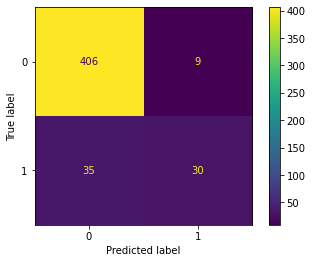

In [16]:
print(classification_report(y_test, y_test_pred))
plot_confusion_matrix(best_rfc, X_test, y_test)
plt.show()

In [17]:
help(RandomForestClassifier.feature_importances_)

Help on property:

    The impurity-based feature importances.
    
    The higher, the more important the feature.
    The importance of a feature is computed as the (normalized)
    total reduction of the criterion brought by that feature.  It is also
    known as the Gini importance.
    
    high cardinality features (many unique values). See
    :func:`sklearn.inspection.permutation_importance` as an alternative.
    
    Returns
    -------
    feature_importances_ : ndarray of shape (n_features,)
        The values of this array sum to 1, unless all trees are single node
        trees consisting of only the root node, in which case it will be an
        array of zeros.



(3) The accuracy obtained from GridSearchCV can be different from the accuracy obtained from the test set due to overfitting. GridSearchCV optimizes the model's hyperparameters to fit the validation set, which may not generalize well to new or unseen data. Therefore, it's essential to evaluate the model's performance on an independent test set that is not used during the hyperparameter tuning or training process to obtain a reliable estimate of the model's true performance.

### 4. Reporting the final model 
(1) Plot a confusion matrix for the final model 
(2) Plot the feature importance of the final model. Discuss which features are important in the classification.
(3) Think about the most important feature of your final model. Can you show whether the higher value of the feature leads to a higher quality (y = 1) or to a lower quality (y = 0)?

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       415
           1       0.77      0.46      0.58        65

    accuracy                           0.91       480
   macro avg       0.84      0.72      0.76       480
weighted avg       0.90      0.91      0.90       480



C:\Users\yuori\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


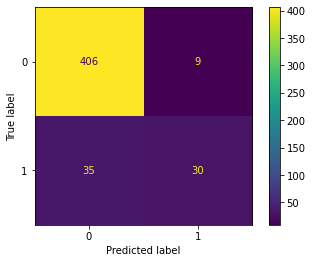

In [18]:
# (1) confusion matrix
print(classification_report(y_test, y_test_pred))
plot_confusion_matrix(best_rfc, X_test, y_test)
plt.show()

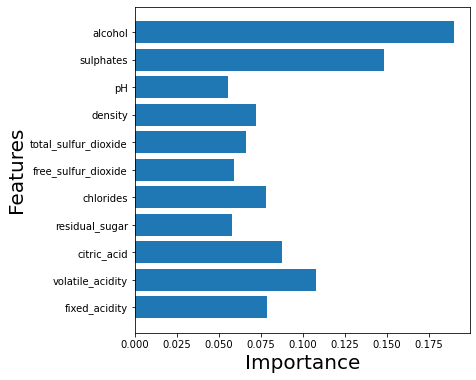

In [19]:
#(2) plot feature importance
plt.figure(figsize = (6,6))
plt.barh(x.columns, best_rfc.feature_importances_)
plt.xlabel('Importance', fontsize = 20)
plt.ylabel('Features', fontsize = 20)
plt.show()

#alcohol and sulphates have the most important in the classification

In [20]:
help(RandomForestClassifier.feature_importances_)

Help on property:

    The impurity-based feature importances.
    
    The higher, the more important the feature.
    The importance of a feature is computed as the (normalized)
    total reduction of the criterion brought by that feature.  It is also
    known as the Gini importance.
    
    high cardinality features (many unique values). See
    :func:`sklearn.inspection.permutation_importance` as an alternative.
    
    Returns
    -------
    feature_importances_ : ndarray of shape (n_features,)
        The values of this array sum to 1, unless all trees are single node
        trees consisting of only the root node, in which case it will be an
        array of zeros.



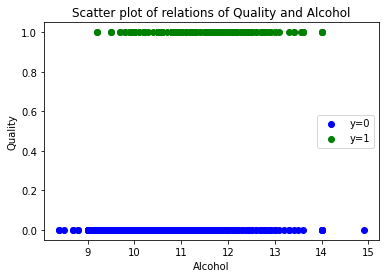

In [21]:
#(3) 
plt.title("Scatter plot of relations of Quality and Alcohol")
x = wine['alcohol']
y = wine['quality']

plt.scatter(x[y==0], y[y==0], color='blue', label='y=0') 
plt.scatter(x[y==1], y[y==1], color='green', label='y=1') 

plt.xlabel('Alcohol')
plt.ylabel('Quality')
plt.legend()

By creating a scatter plot,  binary classification to determine low quality which is 0 and high quality which is 1 on the y axis is conducted , thus we can know whether the high value of feature leads to 1 or low value of feature to 0